In [8]:
import imgaug as ia
from imgaug import augmenters as iaa
from scipy import misc
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

from os import listdir
from os.path import isfile, join
import glob

%matplotlib inline

In [13]:
images = np.random.randint(0, 50, (4, 128, 128, 3), dtype=np.uint8)

images[0].shape

(128, 128, 3)

In [16]:
def cartuple(l):
    x = l.split(' ')
    return [x[0], int(x[1]),int(x[2]),int(x[3]),int(x[4])]

onlyjpegs = glob.glob('/home/stp8954/aic/aic480/train/images/*.jpeg')

img = mpimg.imread('/home/stp8954/aic/aic480/train/images/princess_anne_lynnhaven_20140604_10192.jpeg')

f = open('/home/stp8954/aic/aic480/train/labels/princess_anne_lynnhaven_20140604_10192.txt','r')


x = [ cartuple(a) for a in f]

onlyjpegs[0].replace('/images','/labels').replace('.jpeg','.txt')

'/home/stp8954/aic/aic480/train/labels/princess_anne_lynnhaven_20140604_12356.txt'

In [28]:
keypoints_on_images = []
images = []

for imfile in onlyjpegs[:10]:
    keypoints = []
    image = mpimg.imread(imfile)
    flable = open(imfile.replace('/images','/labels').replace('.jpeg','.txt'))
    
    labels = [cartuple(a) for a in flable]
    
    for label in labels:
        
        keypoints.append(ia.Keypoint(x=label[1], y= label[2]))
        keypoints.append(ia.Keypoint(x=label[1],y= label[4]))
        keypoints.append(ia.Keypoint(x=label[3],y= label[4]))
        keypoints.append(ia.Keypoint(x=label[3],y= label[2]))
              
    keypoints_on_images.append(ia.KeypointsOnImage(keypoints,shape=image.shape))
    images.append(image)
    
    

keypoints_on_images[0]
    

KeypointOnImage([Keypoint(x=227, y=36), Keypoint(x=227, y=64), Keypoint(x=286, y=64), Keypoint(x=286, y=36), Keypoint(x=561, y=402), Keypoint(x=561, y=479), Keypoint(x=699, y=479), Keypoint(x=699, y=402), Keypoint(x=267, y=62), Keypoint(x=267, y=82), Keypoint(x=301, y=82), Keypoint(x=301, y=62), Keypoint(x=638, y=113), Keypoint(x=638, y=181), Keypoint(x=706, y=181), Keypoint(x=706, y=113), Keypoint(x=389, y=130), Keypoint(x=389, y=161), Keypoint(x=451, y=161), Keypoint(x=451, y=130), Keypoint(x=376, y=89), Keypoint(x=376, y=115), Keypoint(x=419, y=115), Keypoint(x=419, y=89), Keypoint(x=7, y=88), Keypoint(x=7, y=111), Keypoint(x=36, y=111), Keypoint(x=36, y=88), Keypoint(x=40, y=55), Keypoint(x=40, y=70), Keypoint(x=64, y=70), Keypoint(x=64, y=55), Keypoint(x=419, y=83), Keypoint(x=419, y=104), Keypoint(x=458, y=104), Keypoint(x=458, y=83), Keypoint(x=35, y=66), Keypoint(x=35, y=82), Keypoint(x=60, y=82), Keypoint(x=60, y=66), Keypoint(x=75, y=61), Keypoint(x=75, y=86), Keypoint(x=106,

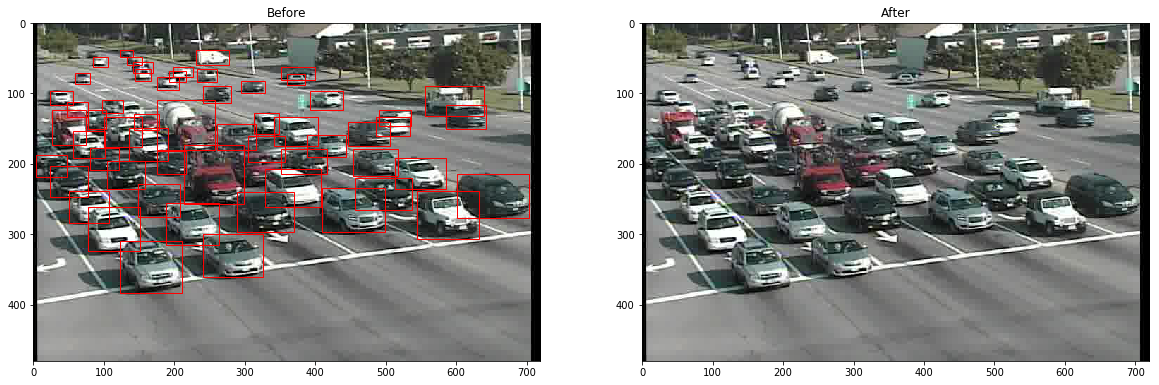

In [3]:
fig = plt.figure(figsize = (20,20))
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img, interpolation='none')

for l in x:
    rect = patches.Rectangle((l[1],l[2]),(l[3]-l[1]),(l[4]-l[2]),linewidth=1,edgecolor='r',facecolor='none')
    a.add_patch(rect)

a.set_title('Before')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img, interpolation='none')
a.set_title('After')

In [48]:
import imgaug as ia
from imgaug import augmenters as iaa

seq = iaa.Sequential(
[
    #iaa.Fliplr(1)
    #iaa.Fliplr(1)
    #iaa.GaussianBlur(3.0)
    iaa.Affine(rotate=(-45,45))
],
    random_order=True
)

seq_det = seq.to_deterministic()

images_aug = seq_det.augment_images(images)
keypoints_aug = seq_det.augment_keypoints(keypoints_on_images)

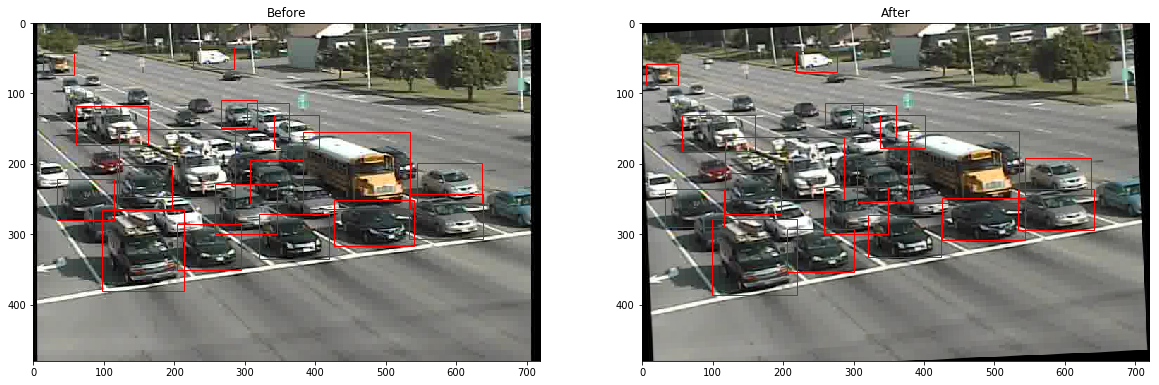

In [49]:
fig = plt.figure(figsize = (20,20))
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(images[5], interpolation='none')

a.set_title('Before')
b = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(images_aug[5], interpolation='none')
b.set_title('After')


for x in xrange(0,len(keypoints_on_images[5].keypoints),4):
    kp = keypoints_on_images[5].keypoints
    kp_aug = keypoints_aug[5].keypoints
    
    rect = patches.Rectangle((kp[x].x,kp[x].y),(kp[x+2].x-kp[x].x),(kp[x+2].y-kp[x].y),linewidth=1,edgecolor='r',facecolor='none')
    a.add_patch(rect)
    rect = patches.Rectangle((kp_aug[x].x,kp_aug[x].y),(kp_aug[x+2].x-kp_aug[x].x),(kp_aug[x+2].y-kp_aug[x].y),linewidth=1,edgecolor='r',facecolor='none')
    b.add_patch(rect)

#for l in x:
#    rect = patches.Rectangle((l[1],l[2]),(l[3]-l[1]),(l[4]-l[2]),linewidth=1,edgecolor='r',facecolor='none')
#    a.add_patch(rect)

In [40]:
for x in xrange(0,len(keypoints_on_images[0].keypoints),4):
    print(x)

0
4
8
12
16
20
24
28
32
36
40


In [39]:
len(keypoints_on_images[0].keypoints)

44